In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(stringr)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [38]:
data <- read_csv("movies.csv")
data

Rows: 99 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): movie_name, year_of_release, category, run_time, genre, gross_total
dbl (2): index, imdb_rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,1860471,$134.97M
2,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,1435344,$130.74M
3,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,1294805,$290.48M
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,Eternal Sunshine of the Spotless Mind,(2004),R,108 min,"Drama, Romance, Sci-Fi",8.3,1011004,$34.40M
98,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,186059,$0.02M
99,The Matrix,(1999),R,136 min,"Action, Sci-Fi",8.7,1916083,$171.48M


In [49]:
movies_data <- data |>
    select(index, movie_name, year_of_release, category, run_time, imdb_rating, votes, gross_total) |>
    arrange(desc(imdb_rating))
movies_data

index,movie_name,year_of_release,category,run_time,imdb_rating,votes,gross_total
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
4,The Shawshank Redemption,1994,R,142 min,9.3,2683302,$28.34M
1,The Godfather,1972,R,175 min,9.2,1860471,$134.97M
9,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,9.0,1849082,$377.85M
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
85,"O Brother, Where Art Thou?",2000,PG-13,107 min,7.7,315173,$45.51M
90,The Piano,1993,R,121 min,7.5,89819,$40.16M
49,Avanti!,1972,R,144 min,7.2,10748,$3.30M


In [2]:
movies_data <- movies_data |>
    mutate(year_of_release = str_replace_all(year_of_release, "[()]", "")) |>
    mutate(year_of_release = as.numeric(year_of_release))
movies_data

ERROR: Error in mutate(mutate(movies_data, year_of_release = str_replace_all(year_of_release, : could not find function "mutate"


In [51]:
summary_data <- movies_data |>
    group_by(year_of_release) |>
    summarize(Average_rating_per_year = mean(imdb_rating, na.rm = TRUE))
summary_data

year_of_release,Average_rating_per_year
<dbl>,<dbl>
1931,8.5
1936,8.5
1939,8.2
⋮,⋮
2013,7.95
2014,8.60
2015,7.95


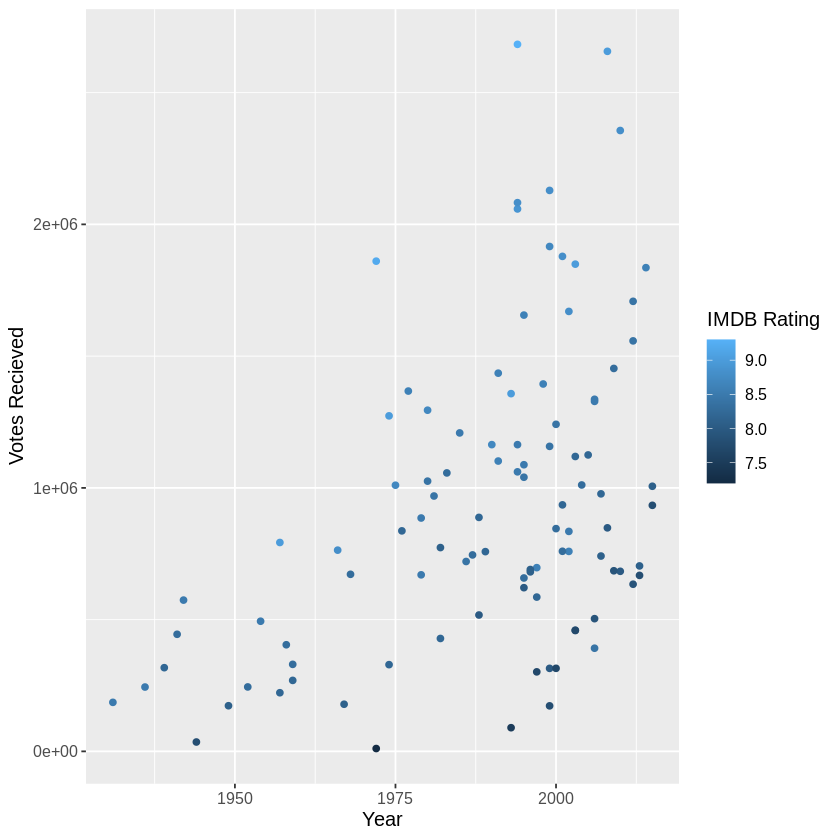

In [54]:
movies_data_plot <- ggplot(movies_data, aes(x = year_of_release, y = votes))+
    geom_point(aes(color = imdb_rating))+
    labs(x = "Year", y = "Votes Recieved", color = "IMDB Rating")+
    theme(text = element_text(size = 12))
movies_data_plot

Ideas on what to predict
- Use the year, category, votes and gross total to predict the rating
- predict the year of release by using votes, rating and gross total

In [ ]:
source("cleanup.R")